In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset (mpg dataset with horsepower and mpg)
mpg_data = sns.load_dataset('mpg').dropna(subset=['horsepower', 'mpg'])

In [3]:
# Features and target
X = mpg_data[['horsepower']]  # original feature
y = mpg_data['mpg']           # target variable

# Add nonlinear feature: horsepower squared
X['horsepower_squared'] = X['horsepower'] ** 2

/tmp/ipykernel_2347744/469262825.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['horsepower_squared'] = X['horsepower'] ** 2


In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Model 1: Linear regression with horsepower only
model_linear = LinearRegression()
model_linear.fit(X_train[['horsepower']], y_train)
y_pred_linear = model_linear.predict(X_test[['horsepower']])
mse_linear = mean_squared_error(y_test, y_pred_linear)


In [6]:

# Model 2: Linear regression with horsepower and horsepower squared
model_poly = LinearRegression()
model_poly.fit(X_train[['horsepower', 'horsepower_squared']], y_train)
y_pred_poly = model_poly.predict(X_test[['horsepower', 'horsepower_squared']])
mse_poly = mean_squared_error(y_test, y_pred_poly)


In [7]:

# Print Mean Squared Errors
print(f"MSE with linear feature only: {mse_linear:.2f}")
print(f"MSE with linear + squared feature: {mse_poly:.2f}")


MSE with linear feature only: 24.56
MSE with linear + squared feature: 20.45


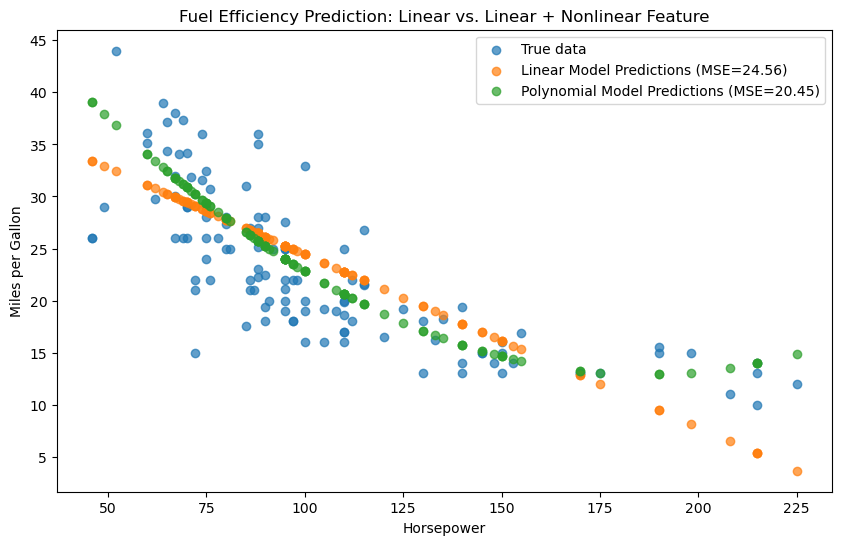

In [8]:

# Plot comparison
plt.figure(figsize=(10,6))
plt.scatter(X_test['horsepower'], y_test, label='True data', alpha=0.7)
plt.scatter(X_test['horsepower'], y_pred_linear, label=f'Linear Model Predictions (MSE={mse_linear:.2f})', alpha=0.7)
plt.scatter(X_test['horsepower'], y_pred_poly, label=f'Polynomial Model Predictions (MSE={mse_poly:.2f})', alpha=0.7)
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon')
plt.title('Fuel Efficiency Prediction: Linear vs. Linear + Nonlinear Feature')
plt.legend()
plt.show()